# Figure 6 - Bulk skill plots

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#bulk_skill = xr.open_dataset('bulk_skill_metrics.nc')
bulk_skill_layerwise  = xr.open_dataset('./bulk_skill/bulk_skill_metrics_layerwise_with_dir_all.nc')

In [7]:
bulk_skill_layerwise

<xarray.Dataset> Size: 13kB
Dimensions:        (data_set: 2, filter_scales: 4, coarsen_time: 5, model: 5,
                    layer: 2, direction: 2)
Coordinates:
  * data_set       (data_set) <U3 24B 'DG' 'P2L'
  * filter_scales  (filter_scales) int64 32B 50 100 200 400
  * coarsen_time   (coarsen_time) int64 40B 0 16 64 128 256
  * model          (model) <U15 300B '1point' '3point' ... '5point'
  * layer          (layer) int64 16B 0 1
  * direction      (direction) <U4 32B 'uphp' 'vphp'
Data variables:
    R2             (data_set, filter_scales, coarsen_time, model, layer, direction) float64 6kB ...
    corr           (data_set, filter_scales, coarsen_time, model, layer, direction) float64 6kB ...

In [9]:
model_arange = ['1point','3point','5point','grad_model','gent_mcwilliams']
model_arange_layer = ['1point','3point','5point','grad_model','gent_mcwilliams']
#model_arange_layer = ['1point','3point','grad_model','gent_mcwilliams']
titles = ['1 X 1', 
          '3 X 3',
          '5 X 5',
          'VGM',
          'GM']


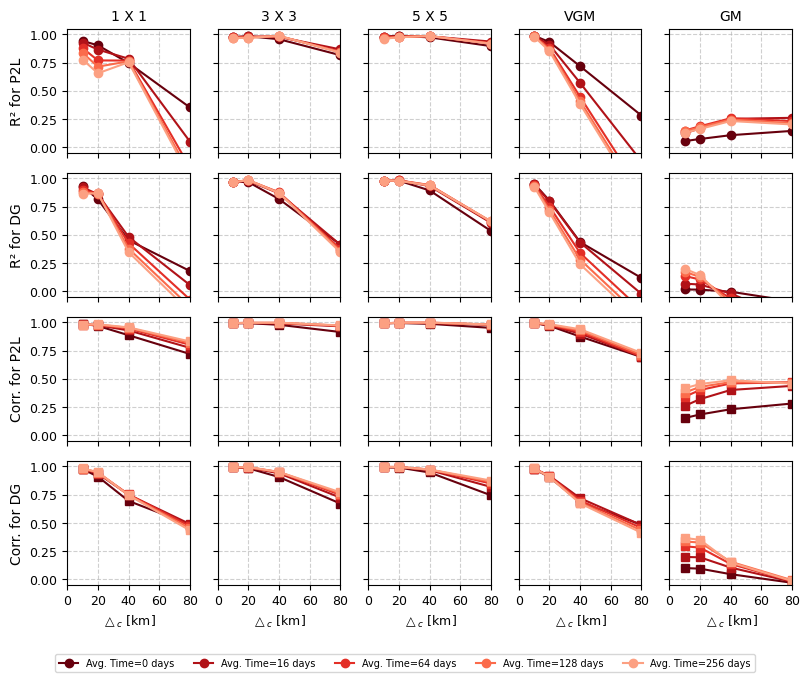

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size for 4 rows × 5 cols
fig, axes = plt.subplots(4, 5, figsize=(8.2, 6.5), sharex=True, sharey=True)

xticks = [0, 100, 200, 300, 400]
xtick_labels = ['0', '20', '40', '60', '80']


exp_labels = ["P2L", "DG"]
colors = plt.cm.Reds_r(np.linspace(0, 1, len(bulk_skill_layerwise.coarsen_time) + 2))

for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row, col]
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t).mean(['layer','direction']).R2.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values} days", ax=ax, marker='o'
            )
        
        ax.set_title(titles[col], fontsize=10)
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 90])
        ax.set_xticks(xticks)
        ax.set_xticklabels(xtick_labels)
        ax.grid(True, linestyle='--', alpha=0.6)
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("R² for " + exp, fontsize=10)
            ax.set_yticks([0,.25,.5,.75,1.])
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row of this section
        if row == 1:
            ax.set_xlabel("")
            #ax.set_xlabel("Filter Scale [km]", fontsize=9)
            ax.set_title("")
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Now add Corr. plots in the next two rows
for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row + 2, col]  # Shift index for bottom two rows
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t).mean(['layer','direction']).corr.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values} days", ax=ax, marker='s'
            )
        
        ax.set_title("")  # No title for the lower half
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        ax.grid(True, linestyle='--', alpha=0.6)
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("Corr. for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row
        if row == 1:
            ax.set_xlabel(r"$\triangle_c$ [km]", fontsize=9)
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.08, right=0.98, top=0.92, bottom=0.12, wspace=0., hspace=0.0)

# Add a single legend outside the plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=7)

plt.tight_layout()

# Save as high-resolution figures
plt.savefig("Figures/R2_Corr_combined_plot_bulk.pdf", dpi=300, bbox_inches="tight")
#plt.savefig("R2_Corr_combined_plot.png", dpi=300, bbox_inches="tight")

#plt.show()


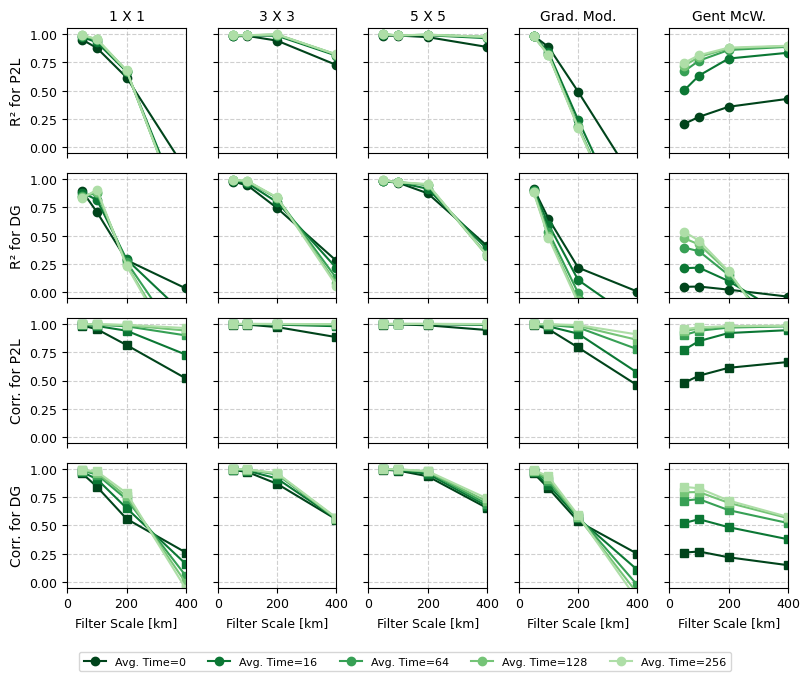

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size for 4 rows × 5 cols
fig, axes = plt.subplots(4, 5, figsize=(8.2, 6.5), sharex=True, sharey=True)

direction='uphp'
layer=1

exp_labels = ["P2L", "DG"]
colors = plt.cm.Greens_r(np.linspace(0, 1, len(bulk_skill_layerwise.coarsen_time) + 2))

for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row, col]
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).R2.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='o'
            )
        
        ax.set_title(titles[col], fontsize=10)
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        ax.set_yticks([0,.25,.5,.75,1.])
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("R² for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row of this section
        if row == 1:
            ax.set_xlabel("")
            #ax.set_xlabel("Filter Scale [km]", fontsize=9)
            ax.set_title("")
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Now add Corr. plots in the next two rows
for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row + 2, col]  # Shift index for bottom two rows
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).corr.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='s'
            )
        
        ax.set_title("")  # No title for the lower half
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        ax.grid(True, linestyle='--', alpha=0.6)
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("Corr. for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row
        if row == 1:
            ax.set_xlabel("Filter Scale [km]", fontsize=9)
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.08, right=0.98, top=0.92, bottom=0.12, wspace=0.3, hspace=0.4)

# Add a single legend outside the plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=8)

plt.tight_layout()

# Save as high-resolution figures
plt.savefig("R2_Corr_combined_plot_bulk_bottom_layer_along_grad.pdf", dpi=300, bbox_inches="tight")
#plt.savefig("R2_Corr_combined_plot.png", dpi=300, bbox_inches="tight")

#plt.show()


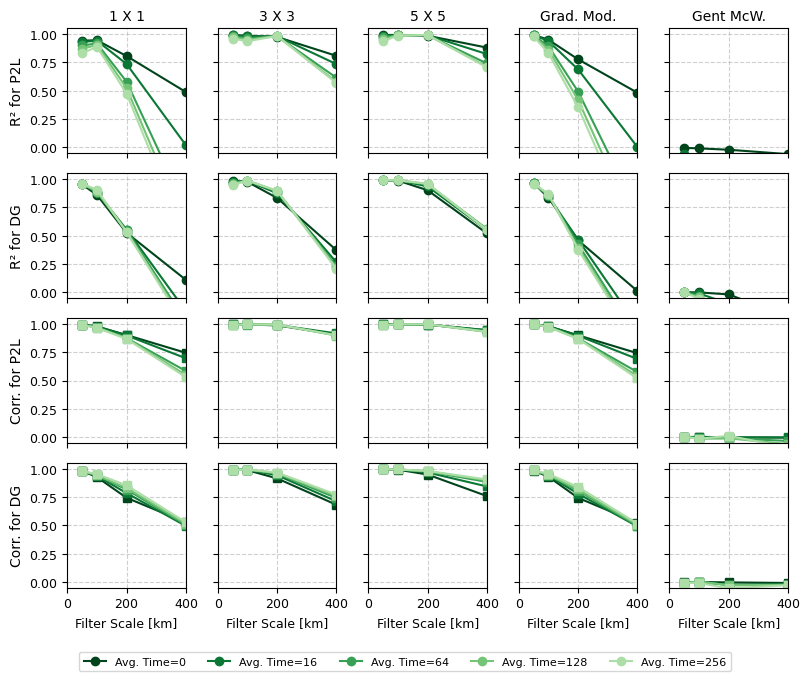

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size for 4 rows × 5 cols
fig, axes = plt.subplots(4, 5, figsize=(8.2, 6.5), sharex=True, sharey=True)

direction='vphp'
layer=1

exp_labels = ["P2L", "DG"]
colors = plt.cm.Greens_r(np.linspace(0, 1, len(bulk_skill_layerwise.coarsen_time) + 2))

for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row, col]
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).R2.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='o'
            )
        
        ax.set_title(titles[col], fontsize=10)
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("R² for " + exp, fontsize=10)
            ax.set_yticks([0,.25,.5,.75,1.])
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row of this section
        if row == 1:
            ax.set_xlabel("")
            #ax.set_xlabel("Filter Scale [km]", fontsize=9)
            ax.set_title("")
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Now add Corr. plots in the next two rows
for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row + 2, col]  # Shift index for bottom two rows
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).corr.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='s'
            )
        
        ax.set_title("")  # No title for the lower half
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        ax.grid(True, linestyle='--', alpha=0.6)
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("Corr. for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row
        if row == 1:
            ax.set_xlabel("Filter Scale [km]", fontsize=9)
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.08, right=0.98, top=0.92, bottom=0.12, wspace=0.3, hspace=0.4)

# Add a single legend outside the plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=8)

plt.tight_layout()

# Save as high-resolution figures
plt.savefig("R2_Corr_combined_plot_bulk_bottom_layer_across_grad.pdf", dpi=300, bbox_inches="tight")
#plt.savefig("R2_Corr_combined_plot.png", dpi=300, bbox_inches="tight")

#plt.show()


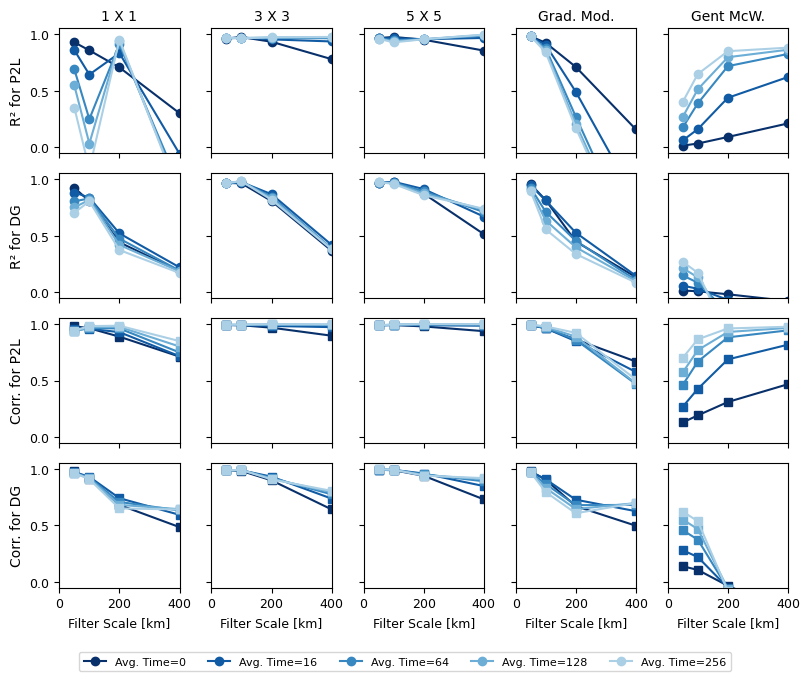

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size for 4 rows × 5 cols
fig, axes = plt.subplots(4, 5, figsize=(8.2, 6.5), sharex=True, sharey=True)

direction='uphp'
layer=0

exp_labels = ["P2L", "DG"]
colors = plt.cm.Blues_r(np.linspace(0, 1, len(bulk_skill_layerwise.coarsen_time) + 2))

for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row, col]
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).R2.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='o'
            )
        
        ax.set_title(titles[col], fontsize=10)
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("R² for " + exp, fontsize=10)
            ax.set_yticks([0,.25,.5,.75,1.])
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row of this section
        if row == 1:
            ax.set_xlabel("")
            #ax.set_xlabel("Filter Scale [km]", fontsize=9)
            ax.set_title("")
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Now add Corr. plots in the next two rows
for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row + 2, col]  # Shift index for bottom two rows
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).corr.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='s'
            )
        
        ax.set_title("")  # No title for the lower half
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("Corr. for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row
        if row == 1:
            ax.set_xlabel("Filter Scale [km]", fontsize=9)
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.08, right=0.98, top=0.92, bottom=0.12, wspace=0.3, hspace=0.4)

# Add a single legend outside the plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=8)

plt.tight_layout()

# Save as high-resolution figures
plt.savefig("R2_Corr_combined_plot_bulk_top_layer_along_grad.pdf", dpi=300, bbox_inches="tight")
#plt.savefig("R2_Corr_combined_plot.png", dpi=300, bbox_inches="tight")

#plt.show()


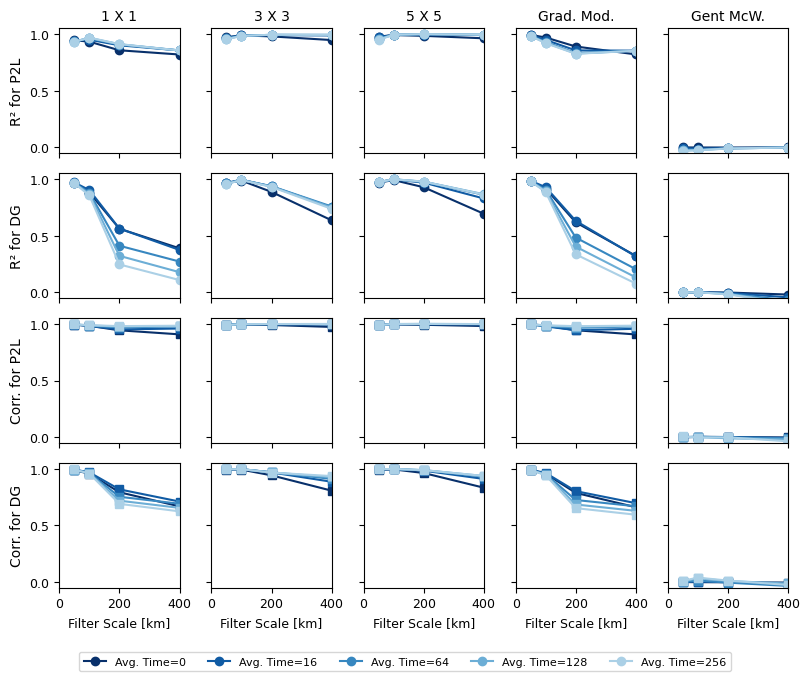

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size for 4 rows × 5 cols
fig, axes = plt.subplots(4, 5, figsize=(8.2, 6.5), sharex=True, sharey=True)

direction='vphp'
layer=0

exp_labels = ["P2L", "DG"]
colors = plt.cm.Blues_r(np.linspace(0, 1, len(bulk_skill_layerwise.coarsen_time) + 2))

for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row, col]
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).R2.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='o'
            )
        
        ax.set_title(titles[col], fontsize=10)
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("R² for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row of this section
        if row == 1:
            ax.set_xlabel("")
            #ax.set_xlabel("Filter Scale [km]", fontsize=9)
            ax.set_title("")
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Now add Corr. plots in the next two rows
for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row + 2, col]  # Shift index for bottom two rows
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t, direction=direction).isel(layer=layer).corr.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values}", ax=ax, marker='s'
            )
        
        ax.set_title("")  # No title for the lower half
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("Corr. for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row
        if row == 1:
            ax.set_xlabel("Filter Scale [km]", fontsize=9)
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.08, right=0.98, top=0.92, bottom=0.12, wspace=0.3, hspace=0.4)

# Add a single legend outside the plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=8)

plt.tight_layout()

# Save as high-resolution figures
plt.savefig("R2_Corr_combined_plot_bulk_top_layer_across_grad.pdf", dpi=300, bbox_inches="tight")
#plt.savefig("R2_Corr_combined_plot_bulk_bottom_layer.pdf", dpi=300, bbox_inches="tight")
#plt.savefig("R2_Corr_combined_plot.png", dpi=300, bbox_inches="tight")

#plt.show()


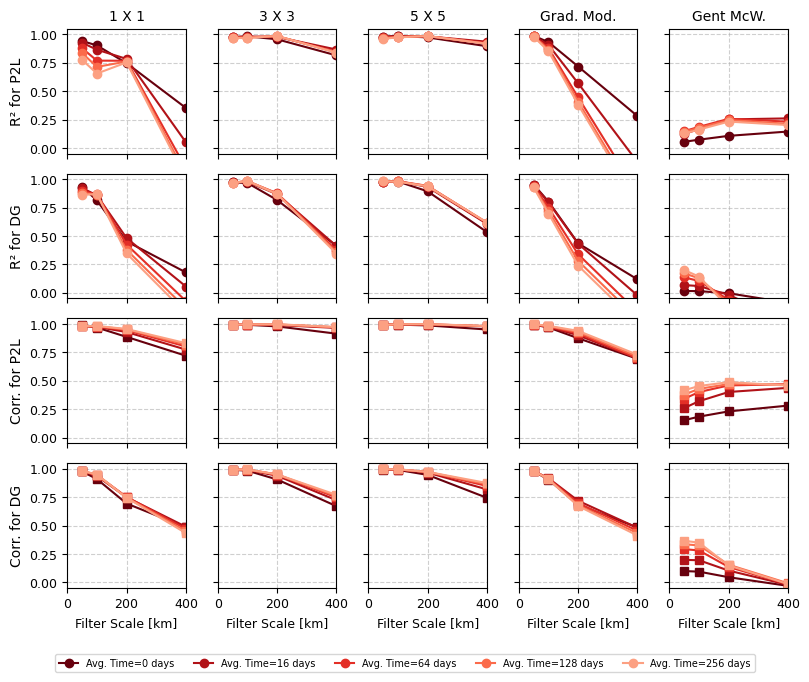

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size for 4 rows × 5 cols
fig, axes = plt.subplots(4, 5, figsize=(8.2, 6.5), sharex=True, sharey=True)


exp_labels = ["P2L", "DG"]
colors = plt.cm.Reds_r(np.linspace(0, 1, len(bulk_skill_layerwise.coarsen_time) + 2))

for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row, col]
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t).mean(['layer','direction']).R2.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values} days", ax=ax, marker='o'
            )
        
        ax.set_title(titles[col], fontsize=10)
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        ax.grid(True, linestyle='--', alpha=0.6)
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("R² for " + exp, fontsize=10)
            ax.set_yticks([0,.25,.5,.75,1.])
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row of this section
        if row == 1:
            ax.set_xlabel("")
            #ax.set_xlabel("Filter Scale [km]", fontsize=9)
            ax.set_title("")
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Now add Corr. plots in the next two rows
for row, exp in enumerate(exp_labels):
    for col, key in enumerate(model_arange_layer):
        ax = axes[row + 2, col]  # Shift index for bottom two rows
        
        for t, color in zip(bulk_skill_layerwise.coarsen_time, colors):
            bulk_skill_layerwise.sel(data_set=exp, model=key, coarsen_time=t).mean(['layer','direction']).corr.plot(
                linewidth=1.5, color=color, label=f"Avg. Time={t.values} days", ax=ax, marker='s'
            )
        
        ax.set_title("")  # No title for the lower half
        ax.set_ylim([-0.05, 1.05])
        ax.set_xlim([0, 400])
        ax.grid(True, linestyle='--', alpha=0.6)
        # Add y-labels only for the leftmost plots
        if col == 0:
            ax.set_ylabel("Corr. for " + exp, fontsize=10)
        else:
            ax.set_ylabel("")
        
        # Add x-labels only for the bottom row
        if row == 1:
            ax.set_xlabel("Filter Scale [km]", fontsize=9)
        else:
            ax.set_xlabel("")
        
        ax.tick_params(axis="both", labelsize=9)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.08, right=0.98, top=0.92, bottom=0.12, wspace=0., hspace=0.0)

# Add a single legend outside the plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, fontsize=7)

plt.tight_layout()

# Save as high-resolution figures
plt.savefig("R2_Corr_combined_plot_bulk.pdf", dpi=300, bbox_inches="tight")
#plt.savefig("R2_Corr_combined_plot.png", dpi=300, bbox_inches="tight")

#plt.show()
